#### Kiran Prakash Kannappa Reddy Mani(50571452) ####

## 1. Environment Setup & Data Loading ##

In [24]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the data
df = pd.read_csv('ToyotaCorolla.csv')

# Check dataset shape
print("Dataset shape:", df.shape)

# Preview first few rows
df.head()



Dataset shape: (2872, 24)


,Id,Price,Age_08_22,KM,Fuel_Type,HP,Color,Automatic,CC,Doors,...,Airbag_1,Airbag_2,Airco,CD_Player,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Metallic_Rim
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,13500.0,23.0,46986.0,Diesel,90.0,Blue,0.0,2000.0,3.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,13750.0,23.0,72937.0,Diesel,90.0,Silver,0.0,2000.0,3.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Data Preprocessing (Initial Cleaning) ##

In [26]:
# Drop rows where 'Price' is NaN
df_clean = df.dropna(subset=['Price'])

# Check dataset shape after cleaning
print("Cleaned dataset shape:", df_clean.shape)

Cleaned dataset shape: (1435, 24)


## 3. Checking Missing Values & Data Types ##

In [32]:
# Check missing values per column
print(df_clean.isnull().sum())

# Check data types of each column
print(df_clean.dtypes)

Id                    0
Price                 0
Age_08_22             0
KM                    0
Fuel_Type             0
HP                    0
Color                 9
Automatic             0
CC                    5
Doors                 0
Cylinders             0
Gears                 0
Mfr_Guarantee         1
ABS                   0
Airbag_1              0
Airbag_2              0
Airco                 1
CD_Player             0
Powered_Windows       0
Power_Steering        0
Radio                 0
Mistlamps          1035
Sport_Model           0
Metallic_Rim          0
dtype: int64
Id                 float64
Price              float64
Age_08_22          float64
KM                 float64
Fuel_Type           object
HP                 float64
Color               object
Automatic          float64
CC                 float64
Doors              float64
Cylinders          float64
Gears              float64
Mfr_Guarantee      float64
ABS                float64
Airbag_1           float64
Airbag

## 4. Handling Missing Values ##

In [41]:
df_clean = df_clean.drop(columns=['Mistlamps'])

# Impute 'Color' with mode
color_mode = df_clean['Color'].mode()[0]
df_clean['Color'] = df_clean['Color'].fillna(color_mode)

# Impute numerical columns with median
for col in ['CC', 'Mfr_Guarantee', 'Airco']:
    median_value = df_clean[col].median()
    df_clean[col] = df_clean[col].fillna(median_value)

# Confirm no missing values
df_clean.isnull().sum()

Id                 0
Price              0
Age_08_22          0
KM                 0
Fuel_Type          0
HP                 0
Color              0
Automatic          0
CC                 0
Doors              0
Cylinders          0
Gears              0
Mfr_Guarantee      0
ABS                0
Airbag_1           0
Airbag_2           0
Airco              0
CD_Player          0
Powered_Windows    0
Power_Steering     0
Radio              0
Sport_Model        0
Metallic_Rim       0
dtype: int64

## 5. Exploratory Data Analysis ##

#### 5.1 Price Distribution Plot ####

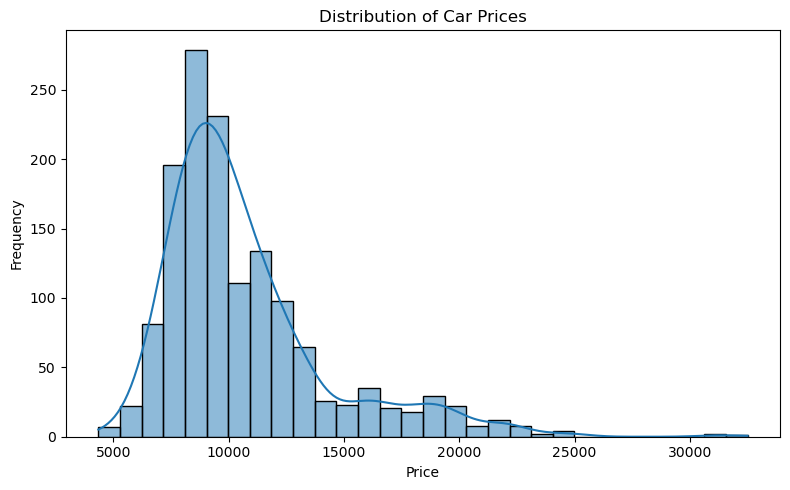

Observations:
- The distribution of car prices is right-skewed.
- Most Toyota Corollas are priced between 8,000 and 13,000 USD.
- A few higher-priced outliers exist, likely representing premium models.


In [48]:
# Price Distribution Plot
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['Price'], kde=True, bins=30)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Observations
print("Observations:")
print("- The distribution of car prices is right-skewed.")
print("- Most Toyota Corollas are priced between 8,000 and 13,000 USD.")
print("- A few higher-priced outliers exist, likely representing premium models.")

#### 5.2 Numerical Predictors vs Price ####

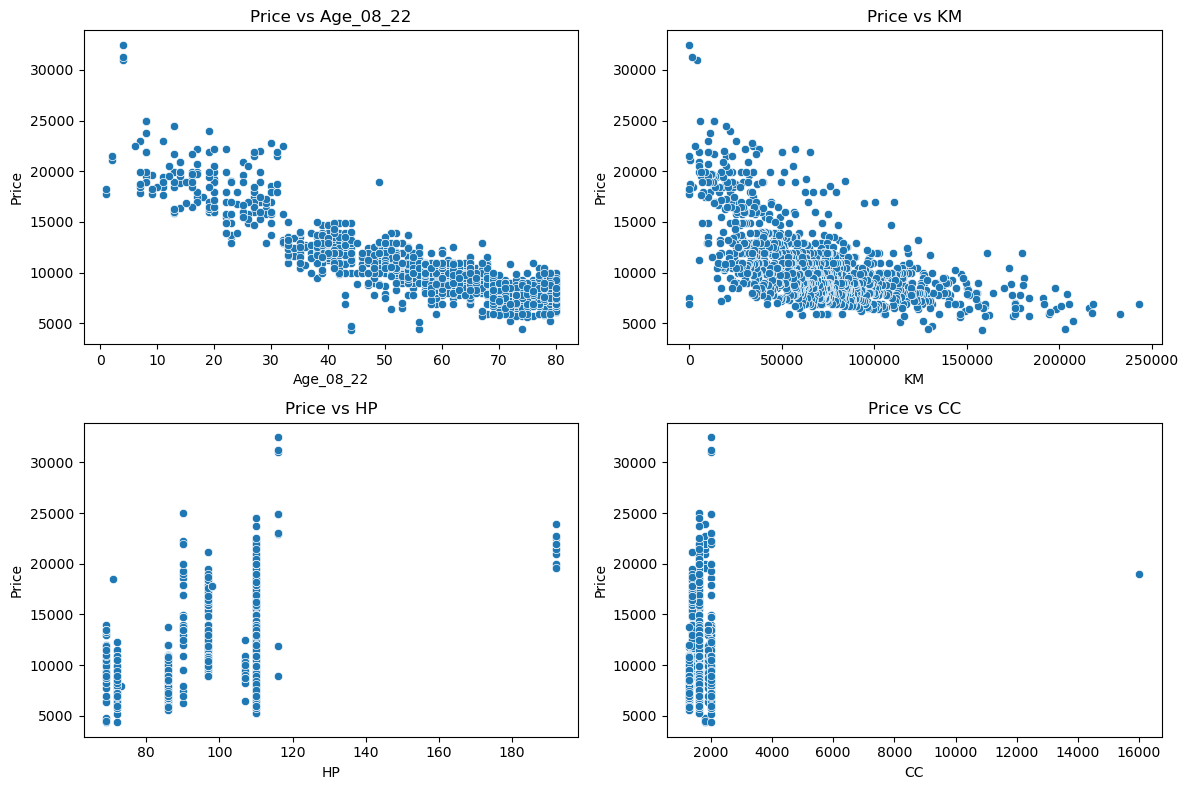

Observations:
- Price tends to decrease with increasing Age_08_22 (negative correlation).
- Price slightly decreases as KM (mileage) increases (weak negative correlation).
- Higher HP (horsepower) is associated with higher prices (positive correlation).
- CC (engine size) shows a positive relationship with price, but with some variability.


In [51]:
# Scatterplots for numerical predictors vs Price
num_features = ['Age_08_22', 'KM', 'HP', 'CC']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(num_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=df_clean[feature], y=df_clean['Price'])
    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

# Observations
print("Observations:")
print("- Price tends to decrease with increasing Age_08_22 (negative correlation).")
print("- Price slightly decreases as KM (mileage) increases (weak negative correlation).")
print("- Higher HP (horsepower) is associated with higher prices (positive correlation).")
print("- CC (engine size) shows a positive relationship with price, but with some variability.")

#### 5.3 Categorical Predictors vs Price ####

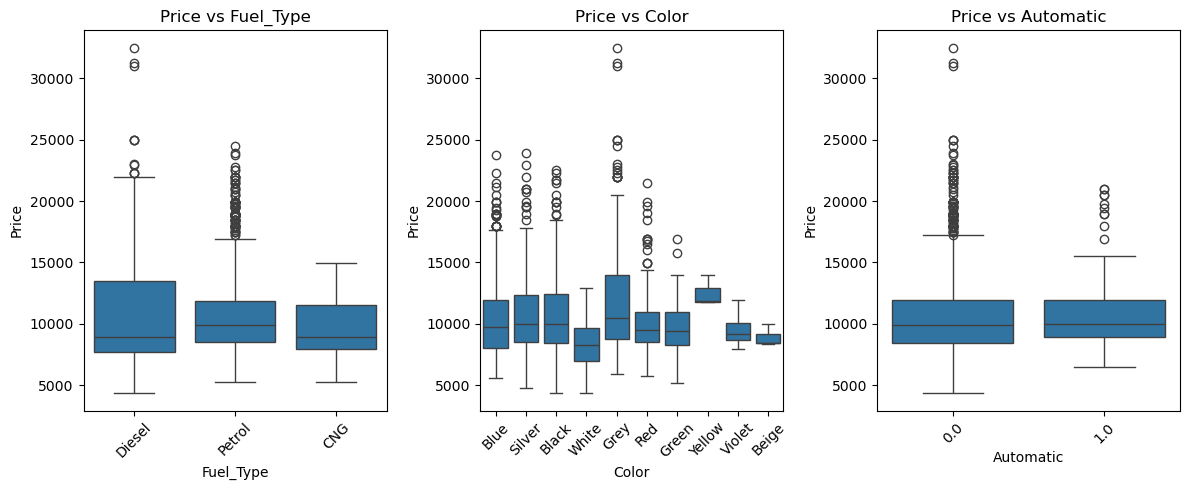

Observations:
- Diesel cars tend to have higher prices than Petrol cars (Fuel_Type).
- Some colors (like Silver and Black) show slightly higher median prices.
- Automatic cars are priced higher than manual ones (Automatic).


In [54]:
# List of categorical predictors
cat_features = ['Fuel_Type', 'Color', 'Automatic']

# Create boxplots
plt.figure(figsize=(12, 5))
for i, feature in enumerate(cat_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df_clean[feature], y=df_clean['Price'])
    plt.title(f'Price vs {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Observations
print("Observations:")
print("- Diesel cars tend to have higher prices than Petrol cars (Fuel_Type).")
print("- Some colors (like Silver and Black) show slightly higher median prices.")
print("- Automatic cars are priced higher than manual ones (Automatic).")

## 6. Feature Selection: Correlation Check ##


#### 6.1 Drop Id ####

In [64]:
# Drop 'Id' column (not predictive)
df_clean = df_clean.drop(columns=['Id'])

#### 6.2: Correlation Heatmap for Numerical Predictors ####

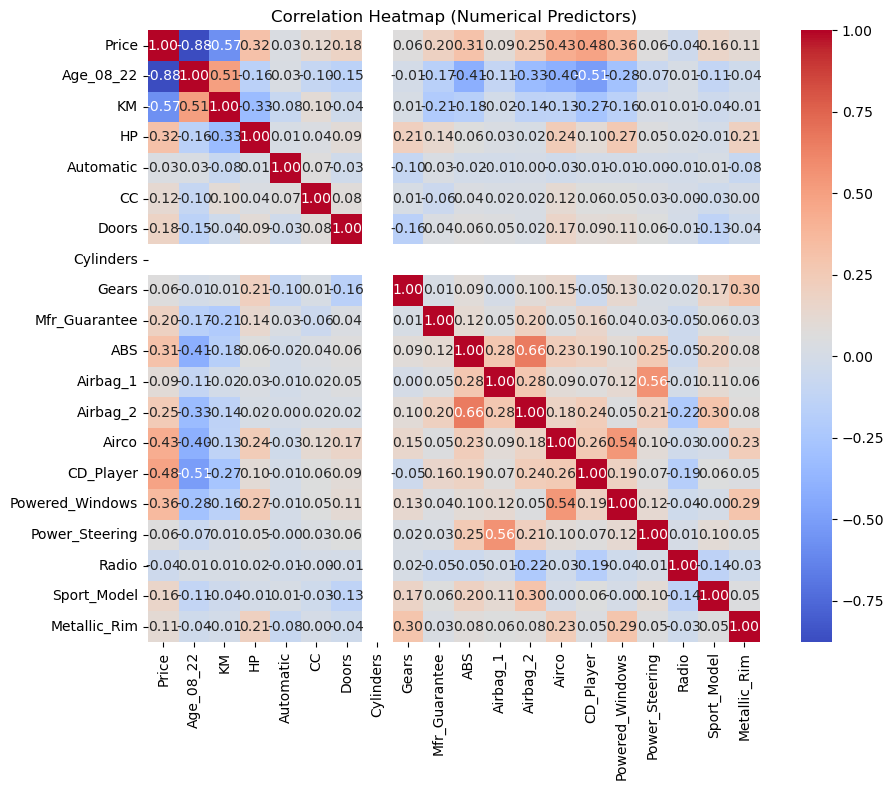

Correlation of predictors with Price:
 Price              1.000000
CD_Player          0.480355
Airco              0.428707
Powered_Windows    0.355966
HP                 0.315574
ABS                0.305901
Airbag_2           0.248551
Mfr_Guarantee      0.198894
Doors              0.184464
Sport_Model        0.162765
CC                 0.123559
Metallic_Rim       0.109200
Airbag_1           0.093480
Power_Steering     0.064168
Gears              0.063304
Automatic          0.033366
Radio             -0.041484
KM                -0.569586
Age_08_22         -0.876389
Cylinders               NaN
Name: Price, dtype: float64


In [68]:
# Compute correlation matrix (only numerical columns)
corr_matrix = df_clean.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap (Numerical Predictors)")
plt.tight_layout()
plt.show()

# Correlation of predictors with Price
corr_with_price = corr_matrix['Price'].sort_values(ascending=False)
print("Correlation of predictors with Price:\n", corr_with_price)


In [72]:
# Recommendation of predictors 
print("\nRecommended Predictors to Keep:")
print("- Strong negative correlation with Price: 'Age_08_22' (-0.88), 'KM' (-0.57)")
print("- Moderate positive correlation with Price: 'CD_Player' (0.48), 'Airco' (0.43), 'Powered_Windows' (0.36), 'HP' (0.32), 'ABS' (0.31)")
print("- Weak but relevant: 'Mfr_Guarantee', 'Doors', 'Sport_Model', 'CC', 'Metallic_Rim', 'Airbag_1', 'Airbag_2', 'Power_Steering', 'Automatic', 'Radio', 'Gears'")
print("- 'Cylinders' has NaN correlation (constant feature) → can be Dropped.")



Recommended Predictors to Keep:
- Strong negative correlation with Price: 'Age_08_22' (-0.88), 'KM' (-0.57)
- Moderate positive correlation with Price: 'CD_Player' (0.48), 'Airco' (0.43), 'Powered_Windows' (0.36), 'HP' (0.32), 'ABS' (0.31)
- Weak but relevant: 'Mfr_Guarantee', 'Doors', 'Sport_Model', 'CC', 'Metallic_Rim', 'Airbag_1', 'Airbag_2', 'Power_Steering', 'Automatic', 'Radio', 'Gears'
- 'Cylinders' has NaN correlation (constant feature) → can be Dropped.


In [74]:
# Drop 'Cylinders' (constant feature)
df_clean = df_clean.drop(columns=['Cylinders'])

## 7. Feature Engineering & Data Preparation ##

In [79]:
# Step 7.1: Define Features & Target
X = df_clean.drop(columns=['Price'])  # Predictors
y = df_clean['Price']                 # Target

# Step 7.2: Preprocessing - Encoding & Scaling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import sklearn
from packaging import version

# Define feature groups
numeric_features = ['Age_08_22', 'KM', 'HP', 'CC', 'Doors', 'Gears']
categorical_features = ['Fuel_Type', 'Color']

# Numeric transformer
numeric_transformer = StandardScaler()

# Categorical transformer with version detection
if version.parse(sklearn.__version__) >= version.parse("1.2"):
    categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)
else:
    categorical_transformer = OneHotEncoder(drop='first', sparse=False)

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Keep binary columns as-is
)

# Step 7.3: Train-Test Split
from sklearn.model_selection import train_test_split

# Perform train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm shapes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1148, 20)
Testing set shape: (287, 20)


## 8. Modeling & Evaluation ##

#### 8.1 Linear Regression Model ####

In [83]:
#Linear Regression Model - Default Hyperparameters
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define pipeline: preprocessing + linear regression
linreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
linreg_pipeline.fit(X_train, y_train)

# Predict on both train and test sets
y_train_pred = linreg_pipeline.predict(X_train)
y_test_pred = linreg_pipeline.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, dataset_name):
    print(f"\n{dataset_name} Performance:")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.2f}")

# Training performance
evaluate_model(y_train, y_train_pred, "Training")

# Testing performance
evaluate_model(y_test, y_test_pred, "Testing")


Training Performance:
R² Score: 0.8621
Mean Absolute Error (MAE): 1013.57
Mean Squared Error (MSE): 1828561.60

Testing Performance:
R² Score: 0.8600
Mean Absolute Error (MAE): 961.38
Mean Squared Error (MSE): 1770088.78


In [85]:
# Observations for Linear Regression
print("Observations for Linear Regression:")
print("- The model achieved an R² score of ~86% on both training and testing sets.")
print("- Mean Absolute Error (MAE) is approximately $1013.57 on training and $961.38 on testing.")
print("- The model shows good generalization with no significant overfitting.")

Observations for Linear Regression:
- The model achieved an R² score of ~86% on both training and testing sets.
- Mean Absolute Error (MAE) is approximately $1013.57 on training and $961.38 on testing.
- The model shows good generalization with no significant overfitting.


#### 8.2 KNN Regressor (Default Hyperparameters) ####

In [89]:
from sklearn.neighbors import KNeighborsRegressor

# Define pipeline: preprocessing + KNN Regressor (default n_neighbors=5)
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

# Train the model
knn_pipeline.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred_knn = knn_pipeline.predict(X_train)
y_test_pred_knn = knn_pipeline.predict(X_test)

# Evaluate
evaluate_model(y_train, y_train_pred_knn, "Training (KNN)")
evaluate_model(y_test, y_test_pred_knn, "Testing (KNN)")


Training (KNN) Performance:
R² Score: 0.9139
Mean Absolute Error (MAE): 797.73
Mean Squared Error (MSE): 1142015.90

Testing (KNN) Performance:
R² Score: 0.8738
Mean Absolute Error (MAE): 954.45
Mean Squared Error (MSE): 1595057.38


In [91]:
print("Observations for KNN Regressor:")
print("- KNN achieved a higher R² on the training set (91.4%) but slightly lower on testing (87.4%) compared to Linear Regression.")
print("- MAE is lower on training (~$797.73), but similar to Linear Regression on testing (~$954.45).")
print("- Mild overfitting observed as training performance is notably better than testing.")

Observations for KNN Regressor:
- KNN achieved a higher R² on the training set (91.4%) but slightly lower on testing (87.4%) compared to Linear Regression.
- MAE is lower on training (~$797.73), but similar to Linear Regression on testing (~$954.45).
- Mild overfitting observed as training performance is notably better than testing.


#### 8.3 Random Forest Regressor (Default hyperparameters) ####

In [97]:
from sklearn.ensemble import RandomForestRegressor

# Define pipeline: preprocessing + Random Forest Regressor (default n_estimators=100)
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred_rf = rf_pipeline.predict(X_train)
y_test_pred_rf = rf_pipeline.predict(X_test)

# Evaluate Random Forest
evaluate_model(y_train, y_train_pred_rf, "Training (Random Forest)")
evaluate_model(y_test, y_test_pred_rf, "Testing (Random Forest)")


Training (Random Forest) Performance:
R² Score: 0.9865
Mean Absolute Error (MAE): 315.12
Mean Squared Error (MSE): 178381.70

Testing (Random Forest) Performance:
R² Score: 0.9092
Mean Absolute Error (MAE): 780.95
Mean Squared Error (MSE): 1148550.51


In [99]:
print("Observations for Random Forest Regressor:")
print("- Random Forest shows excellent training performance (R²: 98.6%) and strong testing performance (R²: 90.9%).")
print("- MAE is significantly lower on training (~$316.59) compared to testing (~$784.47), indicating potential overfitting.")
print("- Despite some overfitting, Random Forest outperforms Linear Regression and KNN on the testing set.")

Observations for Random Forest Regressor:
- Random Forest shows excellent training performance (R²: 98.6%) and strong testing performance (R²: 90.9%).
- MAE is significantly lower on training (~$316.59) compared to testing (~$784.47), indicating potential overfitting.
- Despite some overfitting, Random Forest outperforms Linear Regression and KNN on the testing set.


## 9. Hyperparameter Tuning ##

 Linear Regression does not require hyperparameter tuning in its basic form because it is a parametric model that directly computes the best-fitting coefficients to minimize the difference between predicted and actual values. Unlike models such as KNN or Random Forest, it has no tunable hyperparameters like n_neighbors or n_estimators that control model complexity. Hyperparameters would only be relevant if we used regularized versions like Ridge or Lasso Regression (which introduce penalties and require tuning). Since this assignment specifies basic Linear Regression, no hyperparameter tuning is needed.

#### 9.1 KNN Hyperparameter Tuning ####

In [105]:
from sklearn.model_selection import GridSearchCV

# Define pipeline again (preprocessing + KNN)
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

# Define hyperparameter grid
param_grid_knn = {'regressor__n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

# GridSearchCV for KNN
grid_knn = GridSearchCV(knn_pipeline, param_grid=param_grid_knn, cv=5, scoring='r2')
grid_knn.fit(X_train, y_train)

# Best parameters & score
print("Best n_neighbors:", grid_knn.best_params_)
print("Best cross-validated R² score:", grid_knn.best_score_)

# Evaluate tuned model on test set
y_train_pred_knn_tuned = grid_knn.predict(X_train)
y_test_pred_knn_tuned = grid_knn.predict(X_test)

evaluate_model(y_train, y_train_pred_knn_tuned, "Training (KNN Tuned)")
evaluate_model(y_test, y_test_pred_knn_tuned, "Testing (KNN Tuned)")

Best n_neighbors: {'regressor__n_neighbors': 7}
Best cross-validated R² score: 0.8573349903565306

Training (KNN Tuned) Performance:
R² Score: 0.9011
Mean Absolute Error (MAE): 843.55
Mean Squared Error (MSE): 1311157.37

Testing (KNN Tuned) Performance:
R² Score: 0.8734
Mean Absolute Error (MAE): 941.29
Mean Squared Error (MSE): 1600300.15


In [107]:
print("Observations for KNN Tuning:")
print("- The optimal number of neighbors (n_neighbors) is 7 based on GridSearchCV.")
print("- R² on the testing set remains similar (~87.3%) to the default model, indicating stable performance.")
print("- Tuning slightly reduced overfitting compared to the default KNN.")

Observations for KNN Tuning:
- The optimal number of neighbors (n_neighbors) is 7 based on GridSearchCV.
- R² on the testing set remains similar (~87.3%) to the default model, indicating stable performance.
- Tuning slightly reduced overfitting compared to the default KNN.


#### 9.2 Random Forest Hyperparameter Tuning ####

In [116]:
# Redefine pipeline: preprocessing + Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define hyperparameter grid
param_grid_rf = {'regressor__n_estimators': [50, 100, 150, 200]}

# GridSearchCV for Random Forest
grid_rf = GridSearchCV(rf_pipeline, param_grid=param_grid_rf, cv=5, scoring='r2')
grid_rf.fit(X_train, y_train)

# Best parameters & score
print("Best n_estimators:", grid_rf.best_params_)
print("Best cross-validated R² score:", grid_rf.best_score_)

# Evaluate tuned model on test set
y_train_pred_rf_tuned = grid_rf.predict(X_train)
y_test_pred_rf_tuned = grid_rf.predict(X_test)

evaluate_model(y_train, y_train_pred_rf_tuned, "Training (Random Forest Tuned)")
evaluate_model(y_test, y_test_pred_rf_tuned, "Testing (Random Forest Tuned)")

Best n_estimators: {'regressor__n_estimators': 200}
Best cross-validated R² score: 0.8969146614144394

Training (Random Forest Tuned) Performance:
R² Score: 0.9866
Mean Absolute Error (MAE): 313.32
Mean Squared Error (MSE): 176980.86

Testing (Random Forest Tuned) Performance:
R² Score: 0.9104
Mean Absolute Error (MAE): 781.99
Mean Squared Error (MSE): 1133397.99


In [118]:
print("Observations for Random Forest Tuning:")
print("- The optimal number of trees (n_estimators) is 200 based on GridSearchCV.")
print("- R² improved slightly on the testing set (~91.1%) after tuning, indicating better generalization.")
print("- Training performance remained stable, suggesting tuning helped balance model complexity without overfitting.")

Observations for Random Forest Tuning:
- The optimal number of trees (n_estimators) is 200 based on GridSearchCV.
- R² improved slightly on the testing set (~91.1%) after tuning, indicating better generalization.
- Training performance remained stable, suggesting tuning helped balance model complexity without overfitting.


## 10. Model Summary & Best Model Selection ##


In [121]:

# Creating a summary table of R², MAE, MSE for each model
summary_data = {
    'Model': [
        'Linear Regression',
        'KNN (Default)',
        'KNN (Tuned)',
        'Random Forest (Default)',
        'Random Forest (Tuned)'
    ],
    'Train R²': [
        r2_score(y_train, y_train_pred),
        r2_score(y_train, y_train_pred_knn),
        r2_score(y_train, y_train_pred_knn_tuned),
        r2_score(y_train, y_train_pred_rf),
        r2_score(y_train, y_train_pred_rf_tuned)
    ],
    'Test R²': [
        r2_score(y_test, y_test_pred),
        r2_score(y_test, y_test_pred_knn),
        r2_score(y_test, y_test_pred_knn_tuned),
        r2_score(y_test, y_test_pred_rf),
        r2_score(y_test, y_test_pred_rf_tuned)
    ],
    'Test MAE': [
        mean_absolute_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_pred_knn),
        mean_absolute_error(y_test, y_test_pred_knn_tuned),
        mean_absolute_error(y_test, y_test_pred_rf),
        mean_absolute_error(y_test, y_test_pred_rf_tuned)
    ],
    'Test MSE': [
        mean_squared_error(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_pred_knn),
        mean_squared_error(y_test, y_test_pred_knn_tuned),
        mean_squared_error(y_test, y_test_pred_rf),
        mean_squared_error(y_test, y_test_pred_rf_tuned)
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df

,Model,Train R²,Test R²,Test MAE,Test MSE
0,Linear Regression,0.862060,0.859998,961.378810,1.770089e+06
1,KNN (Default),0.913850,0.873842,954.453659,1.595057e+06
2,KNN (Tuned),0.901091,0.873427,941.288203,1.600300e+06
3,Random Forest (Default),0.986544,0.909158,780.954042,1.148551e+06
4,Random Forest (Tuned),0.986649,0.910356,781.993031,1.133398e+06


In [123]:
print("Model Selection Observations:")
print("- Random Forest Regressor (Tuned) achieved the highest R² on the testing set (91.1%) with the lowest MAE and MSE.")
print("- Linear Regression and KNN performed well but showed lower R² and higher errors compared to Random Forest.")
print("- Therefore, Random Forest Regressor (Tuned) is recommended for ACB Auctions for further testing and development.")

Model Selection Observations:
- Random Forest Regressor (Tuned) achieved the highest R² on the testing set (91.1%) with the lowest MAE and MSE.
- Linear Regression and KNN performed well but showed lower R² and higher errors compared to Random Forest.
- Therefore, Random Forest Regressor (Tuned) is recommended for ACB Auctions for further testing and development.


## Model Selection Summary

Based on the evaluation metrics, **Random Forest Regressor (Tuned)** achieved the **highest R² score (91.1%)** on the testing set along with the **lowest Mean Absolute Error (MAE)** and **Mean Squared Error (MSE)**. While **Linear Regression** and **KNN** provided reasonable performance, Random Forest demonstrated better generalization and predictive accuracy.

**Hence, we recommend the Random Forest Regressor (Tuned)** to ACB Auctions for further testing and development, as it offers the most reliable price predictions for Toyota Corollas based on this dataset.


## 11. Saving the best model for deployment ##

In [129]:
import joblib

# Save the tuned Random Forest pipeline
joblib.dump(grid_rf.best_estimator_, 'random_forest_pipeline.pkl')

['random_forest_pipeline.pkl']